In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns',None)

In [14]:
df=pd.read_csv('google_review_ratings.csv')

In [15]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [17]:
df.drop(['User','Category 11','Unnamed: 25'],axis=1,inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5454 non-null   float64
 1   Category 2   5454 non-null   float64
 2   Category 3   5454 non-null   float64
 3   Category 4   5454 non-null   float64
 4   Category 5   5454 non-null   float64
 5   Category 6   5454 non-null   float64
 6   Category 7   5454 non-null   float64
 7   Category 8   5454 non-null   float64
 8   Category 9   5454 non-null   float64
 9   Category 10  5454 non-null   float64
 10  Category 12  5454 non-null   float64
 11  Category 13  5454 non-null   float64
 12  Category 14  5454 non-null   float64
 13  Category 15  5454 non-null   float64
 14  Category 16  5454 non-null   float64
 15  Category 17  5454 non-null   float64
 16  Category 18  5454 non-null   float64
 17  Category 19  5454 non-null   float64
 18  Category 20  5454 non-null   float64
 19  Catego

In [36]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,clusters
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,2.078401,2.125820,2.190429,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570,0.701687
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,1.249315,1.406682,1.576505,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784,0.697069
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,0.000000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.000000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,2.287500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [20]:
linkage_data=linkage(df,method='ward',metric='euclidean')

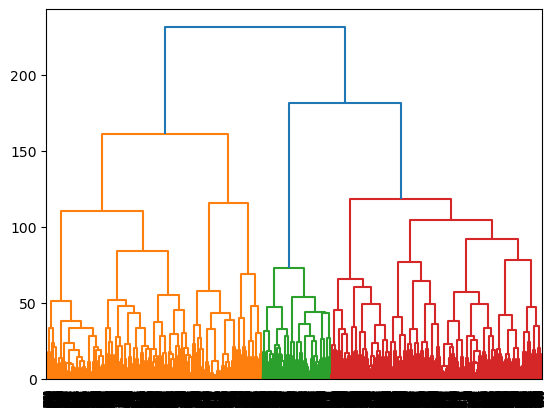

In [21]:
dendrogram(linkage_data)
plt.show()

In [22]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [28]:
df['clusters']=hc.fit_predict(df)

In [29]:
print(df['clusters'])

0       1
1       1
2       1
3       1
4       1
       ..
5451    1
5452    1
5453    1
5454    1
5455    1
Name: clusters, Length: 5454, dtype: int64


In [31]:
silhouette_score(df.drop(['clusters'],axis=1),labels=df['clusters'])

0.12747417200736763

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clusters', ylabel='count'>

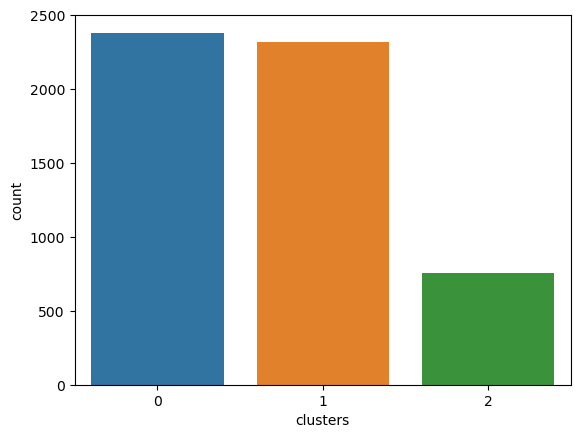

In [33]:
sns.countplot(df['clusters'])